<a href="https://colab.research.google.com/github/rziemann14/AdvLinearAlgebra/blob/master/Project%203%3A%20Singular_Value_Decomposition_with_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular Values Decomposition and Images

In this project, we use the Singular Value Decomposition (SVD) to analyze a matrix which represents a picture and represent the picture using fewer than all of the singular values. 

First, we will import an image of a racoon and save it to our local directory (within Colab).

In [0]:
#  Libraries that we'll need:
import numpy as np
from scipy import misc
from scipy import linalg
from PIL import Image
import imageio
import matplotlib.pyplot as plt

In [0]:
#  Generate a picture to analyze and save it in our directory.
face = misc.face()
imageio.imwrite('face.png', face) #create the image file
#face = imageio.imread('face.jpg') # read in the image file
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

In [0]:
#  Read in face image:
origImg = misc.face()
origImg.shape, origImg.dtype
#  The image contains three colors of data.  Color data extends from 0 to 256.
#  The pixel in entry [100, 100] has values of 94/256 for Red, 82/256 for green, and 92/256 for blue:
origImg[100][100]

array([94, 82, 92], dtype=uint8)

#  1.  The code below is used to adjust the number of singular values used within the image.

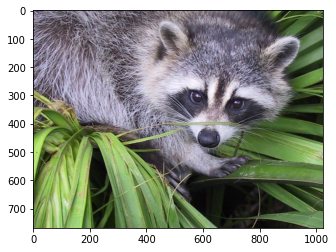

In [0]:
#make a copy of the image
copyImg = origImg.copy()
plt.imshow(copyImg, origin='upper')

In [0]:
#  We'll split the array of colors into three separate matrices:

#  The code below makes a copy of the color data in copyImg[i][j][0] 
#  and puts it into r_image[i][j][0], but leaves the other two colors blank.

#  First, make a matrix to hold the data for the first color.
#(rows, columns, colors) = copyImg.shape

#  Then, copy over the color data:
#r_image = np.random.randn(rows, columns)
#for i in range(rows):
#    for j in range(columns):
#        r_image[i][j] = copyImg[i][j][0]

#  This is a faster way of doing that same code:
r_image = copyImg[:, :, 0]

#  YOU:  creage a g_image and a b_image matrix which contains data for the green and blue pixels.
g_image = copyImg[:, :, 1]
b_image = copyImg[:, :, 2]



In [0]:
# decompose the matrix a, representing the color 0, using SVD:
Ur, sr, Vhr = linalg.svd(r_image)
Ur.shape, sr.shape, Vhr.shape
Mr,Nr = r_image.shape
Sigr = linalg.diagsvd(sr,Mr,Nr)

# YOU:  do the same for the other two colors:
Ug, sg, Vhg = linalg.svd(g_image)
Ug.shape, sg.shape, Vhg.shape
Mg,Ng = g_image.shape
Sigg = linalg.diagsvd(sg,Mg,Ng)

Ub, sb, Vhb = linalg.svd(g_image)
Ub.shape, sb.shape, Vhb.shape
Mb,Nb = b_image.shape
Sigb = linalg.diagsvd(sb,Mb,Nb)

In [0]:
# make a copy of the matrix holding the singular values:
SSigr = Sigr.copy()

# Eliminate some of the singular values in the singular value matrix for color 0:
ZeroAfter = 768
ZeroTo = min(SSigr.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigr[i][i] = 0


# YOU: Modify the code above to do the same thing for the other two colors.
# make a copy of the matrix holding the singular values:
SSigg = Sigg.copy()

SSigb = Sigb.copy()

# Eliminate some of the singular values in the singular value matrix for color 0:
ZeroAfter = 768
ZeroTo = min(SSigg.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigg[i][i] = 0

ZeroAfter = 768
ZeroTo = min(SSigb.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigb[i][i] = 0


In [0]:
# compute the new matrix using just these singular values for the red color:
new_r_image = Ur.dot(SSigr.dot(Vhr))

# YOU:  Do this for the other two colors:
new_g_image = Ug.dot(SSigg.dot(Vhg))

new_b_image = Ub.dot(SSigb.dot(Vhb))

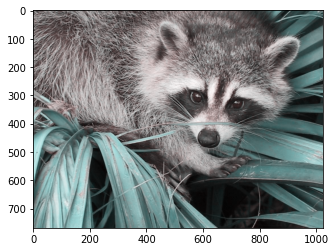

In [0]:
# pack the data from your new matrix back into the image.  
newImg = origImg.copy()
newImg.fill(0)

# We could do this with loops:
#(rows, columns, colors) = newImg.shape
#for i in range(rows):
#    for j in range(columns):
#        newImg[i][j][0] = new_r_image[i][j]

# But this code does it much faster:
newImg[:,:,0] = new_r_image

# YOU:  Modify the code above to pack the data for the other two colors:
newImg[:,:,1] = new_g_image

newImg[:,:,2] = new_b_image

plt.imshow(newImg, origin='upper')

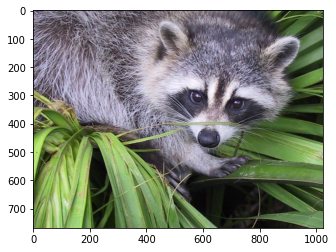

In [0]:
#Original image:
plt.imshow(copyImg, origin='upper')

In [0]:
#  save the image to your directory
filename = 'face_svd_' + str(ZeroAfter) + '.png'
imageio.imwrite(filename, newImg) #create the image file where nnn refers to the singular values you're using for this image.

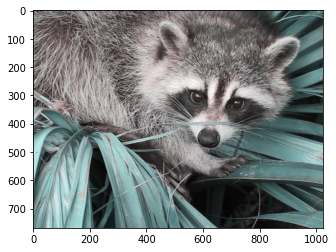

In [0]:
# make a copy of the matrix holding the singular values:
SSigr = Sigr.copy()

# Eliminate some of the singular values in the singular value matrix for color 0:
ZeroAfter = 475
ZeroTo = min(SSigr.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigr[i][i] = 0


# YOU: Modify the code above to do the same thing for the other two colors.
# make a copy of the matrix holding the singular values:
SSigg = Sigg.copy()

SSigb = Sigb.copy()

# Eliminate some of the singular values in the singular value matrix for color 0:
ZeroAfter = 475
ZeroTo = min(SSigg.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigg[i][i] = 0

ZeroAfter = 475
ZeroTo = min(SSigb.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigb[i][i] = 0

# compute the new matrix using just these singular values for the red color:
new_r_image = Ur.dot(SSigr.dot(Vhr))

# YOU:  Do this for the other two colors:
new_g_image = Ug.dot(SSigg.dot(Vhg))

new_b_image = Ub.dot(SSigb.dot(Vhb))

# pack the data from your new matrix back into the image.  
newImg = origImg.copy()
newImg.fill(0)

# We could do this with loops:
#(rows, columns, colors) = newImg.shape
#for i in range(rows):
#    for j in range(columns):
#        newImg[i][j][0] = new_r_image[i][j]

# But this code does it much faster:
newImg[:,:,0] = new_r_image

# YOU:  Modify the code above to pack the data for the other two colors:
newImg[:,:,1] = new_g_image

newImg[:,:,2] = new_b_image

plt.imshow(newImg, origin='upper')

#  save the image to your directory
filename = 'face_svd_' + str(ZeroAfter) + '.png'
imageio.imwrite(filename, newImg) #create the image file where nnn refers to the singular values you're using for this image.

#2.  Analyze the impact of singular values.

Go back to Section 1, and adjust the code just using the ZeroAfter value.  Do this for several different values of ZeroAfter (e.g. 1, 5, 10, 15, 20, 25, 50, 100, 500, and 768).

Then, analyze the results by answering the following questions:

# Question 0:  
How large is the original picture?  ( size depends on rows, columns, and colors)

The original picture has 768 rows, 1,024 columns, and 3 colors. 

How large is the SVD decomposition?  (size depends on number of svds, number of eigenvectors used and size of matrices & and Vh, and number of colors)

The size of the U matrix is 768 x 768. The size of the Sigma matrix is 768 x 1024. The size of the VT matrix is 1024 x 1024. The SVD decomposition has 768 svds and eigenvectors. It also has 3 colors. 

How do these sizes compare?

The sizes of the matrices for the SVD of the image are related to the size of the image. The number of rows in the image is the number of rows and columns in the square matrix U. The Sigma matrix has the same dimensions as the image. The number of columns in the image is the number of rows and columns in the square matrix VT. 

#  Question 1:
What do you expect to see if we use just 1 singular value?

I would expect the picture to be very blurry and the colors to be kind of separated out. 

Did you see what you expected?

I saw what I expected.  

# Question 2:
What do you expect to see if we use all of the singular value?

I would expect the image to be the same as the original image. 

Did you see what you expected?

I didn't see exactly what I expected. I could see the raccoon and the leaves without them being blurry, but the colors weren't quite the same. 




#  Question 3:
Create images using 1, 5, 10, 20, or 25 singular value.  What happens to the image when we include more singular values?

As we include more singular values, the picture gets less blurry and you can start to see the original picture better. 


# Question 4:
How many singular values do you need before you can roughly understand the picture?

It took roughly 10-15 singular values to be able to understand the picture. 

# Question 5:

How many singular values do you need to include to eliminate the color artifacts in the image?

I need to include about 500 singular values to eliminate the color artifacts in the image. 

#  Question 6:

What is the behaviour of the singular values?  
The plot below shows each singular value on the horizontal axis, and the value of each singular value on the vertical axis.  What does this plot tell you about the singular values?

This plot tells me that as the number of singular values increases, the values of them decreases, which means that as the number of singular values increases, each singular value has less of an impact on the matrix (in this case the image). 

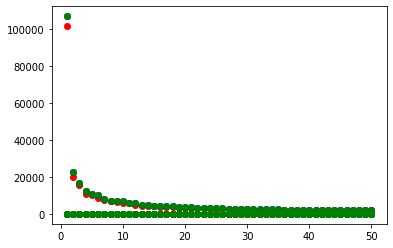

In [0]:
#  Plot the first NumberOfSigs singular values

#  Make this 768 or less:
NumberOfSigs = 50  
x = np.linspace(1,NumberOfSigs,NumberOfSigs)
plt.plot(x,Sigr[0:NumberOfSigs], 'o', color='red');
plt.plot(x,Sigb[0:NumberOfSigs], 'o', color='blue');
plt.plot(x,Sigg[0:NumberOfSigs], 'o', color='green');
